# US life expectancy analysis

First, I set up the libralies and clean up the data.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/data/Jan2024.csv')
del df['state_name']

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from scipy.cluster import hierarchy
from sklearn import decomposition, preprocessing, cluster, tree
from yellowbrick.cluster.silhouette import SilhouetteVisualizer

In [ ]:
def fix_col(col):
  return col.replace(' ', '_').rstrip('.').lstrip('/').lower()

def name(df):
  return (df
   .rename(columns=fix_col))

df2 = name(df)
df3 = df2.set_index('state')
df3

,share_with_any_debt_in_collections,share_with_medical_debt_in_collections,average_household_income,lifeexpectancy,male,female
state,,,,,,
AL,0.337288,0.164056,71478,73.2,70.1,76.4
AK,0.167243,0.038780,98504,76.6,74.3,79.2
AZ,0.266694,0.124015,84438,76.3,73.4,79.5
AR,0.346579,0.177830,68219,73.8,71.1,76.6
CA,0.208771,0.077583,113563,79.0,76.2,82.0
CO,0.213803,0.109629,103518,78.3,75.8,80.9
CT,0.219471,0.095203,114630,78.4,75.6,81.3
DE,0.286683,0.162604,92445,76.7,73.9,79.5
DC,0.223291,0.060608,135369,75.3,71.7,78.7


Once the basic settings were done, I made a bar chart to see the life expactancy from the lowest state to the highest.

<Axes: ylabel='state'>

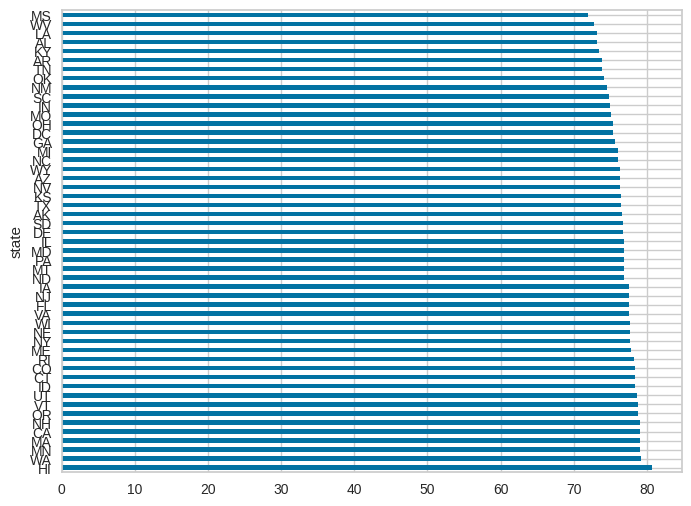

In [ ]:
(df3
['lifeexpectancy']
.sort_values(ascending=False)
.plot(kind='barh',figsize=(8,6))
)

I also made a histogram to see average household income.

<Axes: ylabel='Frequency'>

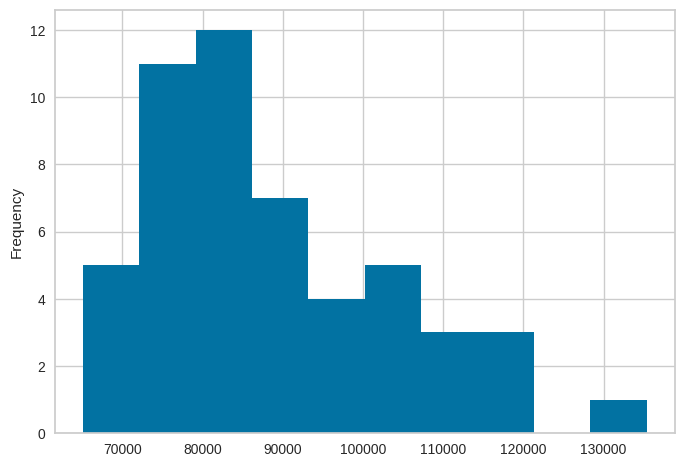

In [ ]:
df3.average_household_income.plot.hist()

The result shows that most of the states have income between 75000~85000.

Then, I wanted to see the relationship between the average income and life expectancy.

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


<Axes: xlabel='average_household_income', ylabel='lifeexpectancy'>

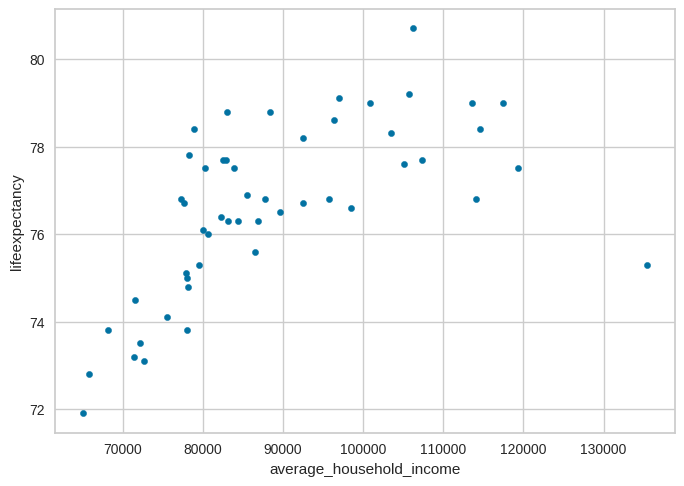

In [ ]:
df3.plot.scatter(x='average_household_income', y='lifeexpectancy')

I expected a linear relationship between income and debt, and the result showed correlation.

I also tried PCA.

In [ ]:
def tweak_kag2(df):
    df = pd.get_dummies(df, drop_first=True)
    cols = [c.replace(' ', '_') for c in df.columns]
    df.columns = cols
    return df
df = tweak_kag2(df)
df

,Share_with_Any_Debt_in_Collections,Share_with_Medical_Debt_in_Collections,Average_household_income,LifeExpectancy,Male,Female,state_AL,state_AR,state_AZ,state_CA,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0.337288,0.164056,71478,73.2,70.1,76.4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.167243,0.038780,98504,76.6,74.3,79.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.266694,0.124015,84438,76.3,73.4,79.5,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.346579,0.177830,68219,73.8,71.1,76.6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.208771,0.077583,113563,79.0,76.2,82.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0.213803,0.109629,103518,78.3,75.8,80.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.219471,0.095203,114630,78.4,75.6,81.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.286683,0.162604,92445,76.7,73.9,79.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.223291,0.060608,135369,75.3,71.7,78.7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.289382,0.143670,83883,77.5,74.6,80.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df
std = preprocessing.StandardScaler()
X_std = pd.DataFrame(std.fit_transform(X), columns=X.columns)
X_std

,Share_with_Any_Debt_in_Collections,Share_with_Medical_Debt_in_Collections,Average_household_income,LifeExpectancy,Male,Female,state_AL,state_AR,state_AZ,state_CA,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,1.248344,0.757978,-1.131679,-1.753273,-1.773421,-1.712991,7.071068,-0.141421,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
1,-1.172076,-1.493430,0.630484,0.003039,0.216452,-0.129722,-0.141421,-0.141421,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
2,0.243506,0.038376,-0.286654,-0.151930,-0.209949,0.039914,-0.141421,-0.141421,7.071068,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
3,1.380595,1.005507,-1.344174,-1.443336,-1.299642,-1.599900,-0.141421,7.071068,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
4,-0.580962,-0.796075,1.612368,1.242788,1.116633,1.453548,-0.141421,-0.141421,-0.141421,7.071068,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
5,-0.509340,-0.220164,0.957409,0.881194,0.927121,0.831549,-0.141421,-0.141421,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
6,-0.428665,-0.479413,1.681939,0.932851,0.832365,1.057730,-0.141421,-0.141421,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
7,0.528030,0.731874,0.235422,0.054695,0.026940,0.039914,-0.141421,-0.141421,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
8,-0.374291,-1.101148,3.034174,-0.668492,-1.015374,-0.412448,-0.141421,-0.141421,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
9,0.566457,0.391613,-0.322842,0.467945,0.358586,0.605368,-0.141421,-0.141421,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421


In [ ]:
pca = decomposition.PCA()
pca_X = pd.DataFrame(pca.fit_transform(X_std), columns=[f'PC{i+1}' for i in range(51)])
pca_X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51
0,3.809232,-0.112749,1.320248,-0.697778,-0.115091,0.143299,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,...,0.000000e+00,-0.000000e+00,1.354916e-36,-8.554141e-22,-0.000000e+00,-1.757696e-173,1.894148e-158,5.149770e+00,-0.033488,5.481299e-16
1,-1.197095,0.027217,0.865879,0.033224,-0.035874,0.001147,3.757019e-16,-7.971016e-16,-9.357999e-16,9.563075e-19,...,-2.755113e-16,-5.606167e-16,5.652839e-16,1.705844e-16,-1.603464e-16,9.019791e-17,4.474236e-17,2.001868e-16,1.696873,5.481299e-16
2,0.378459,-0.239481,-0.026982,-0.916325,0.963108,2.396915,-9.390847e-02,4.329418e-01,2.120027e-01,-6.191683e-01,...,-2.371943e-01,1.525753e+00,-2.281371e+00,3.818310e-01,-3.277451e-01,-1.542090e+00,7.226024e-01,-5.823260e-01,-0.029087,5.481299e-16
3,3.621291,-0.526482,0.309005,-0.613391,-1.787870,0.304593,6.794166e-02,2.267335e-01,1.501684e-01,5.484276e-01,...,-2.627313e-01,3.729774e-01,1.308734e-01,-2.410167e+00,3.285274e-01,-8.137106e-01,4.164676e-02,2.528811e-01,-0.016360,5.481299e-16
4,-3.015237,1.454559,-0.699050,-0.939892,0.631102,2.309184,-1.521190e+00,-1.769182e+00,-6.991625e-01,1.245115e-02,...,-3.754404e-01,-1.691685e+00,5.368080e-01,1.583326e+00,-4.498450e-01,8.440130e-01,-5.258264e-01,3.922987e-02,-0.040840,5.481299e-16
5,-1.938772,0.740519,-0.831370,0.696392,-0.454278,0.456384,-5.022105e-03,-2.535474e-01,-1.013647e+00,8.114695e-02,...,-5.966602e-01,3.149095e+00,2.169364e+00,4.414411e-01,4.413970e-01,-3.108071e-01,-1.184736e+00,-3.177543e-01,-0.033143,5.481299e-16
6,-2.357927,1.855589,-0.561720,-0.113759,0.306290,1.042169,1.759110e+00,8.576131e-01,1.709122e+00,-1.931531e+00,...,-1.700954e+00,-3.398550e-01,6.856846e-01,-7.894587e-02,2.733995e+00,-3.108501e-01,1.186069e-01,-1.395695e-01,-0.040420,5.481299e-16
7,0.410290,0.741559,-1.280171,0.284427,0.014087,-0.874557,-2.021557e+00,1.137420e+00,-6.077328e-01,-6.696956e-02,...,-1.249958e-01,-2.408560e-01,1.647509e-01,5.872111e-01,-1.266937e+00,5.887363e-01,-1.433939e-01,-4.182652e-01,-0.006566,5.481299e-16
8,-0.715892,4.744672,3.502452,0.489232,0.994053,-1.523479,-7.091855e-01,-3.184110e-01,3.713289e-01,9.202934e-01,...,-3.416360e-01,-2.492846e-01,-6.253602e-01,2.928555e-01,-5.936118e-01,-5.537059e-01,-1.626678e+00,-4.522084e-01,-0.111850,5.481299e-16
9,-0.151580,-0.375467,-1.810756,-1.703389,0.706370,0.491947,-9.297404e-01,5.216211e-01,-2.502211e-01,-3.467885e-01,...,1.204313e+00,-5.639861e-01,-8.194841e-01,3.402061e+00,-2.786445e-01,-1.174016e+00,-3.959750e-01,-5.144194e-01,0.003662,5.481299e-16


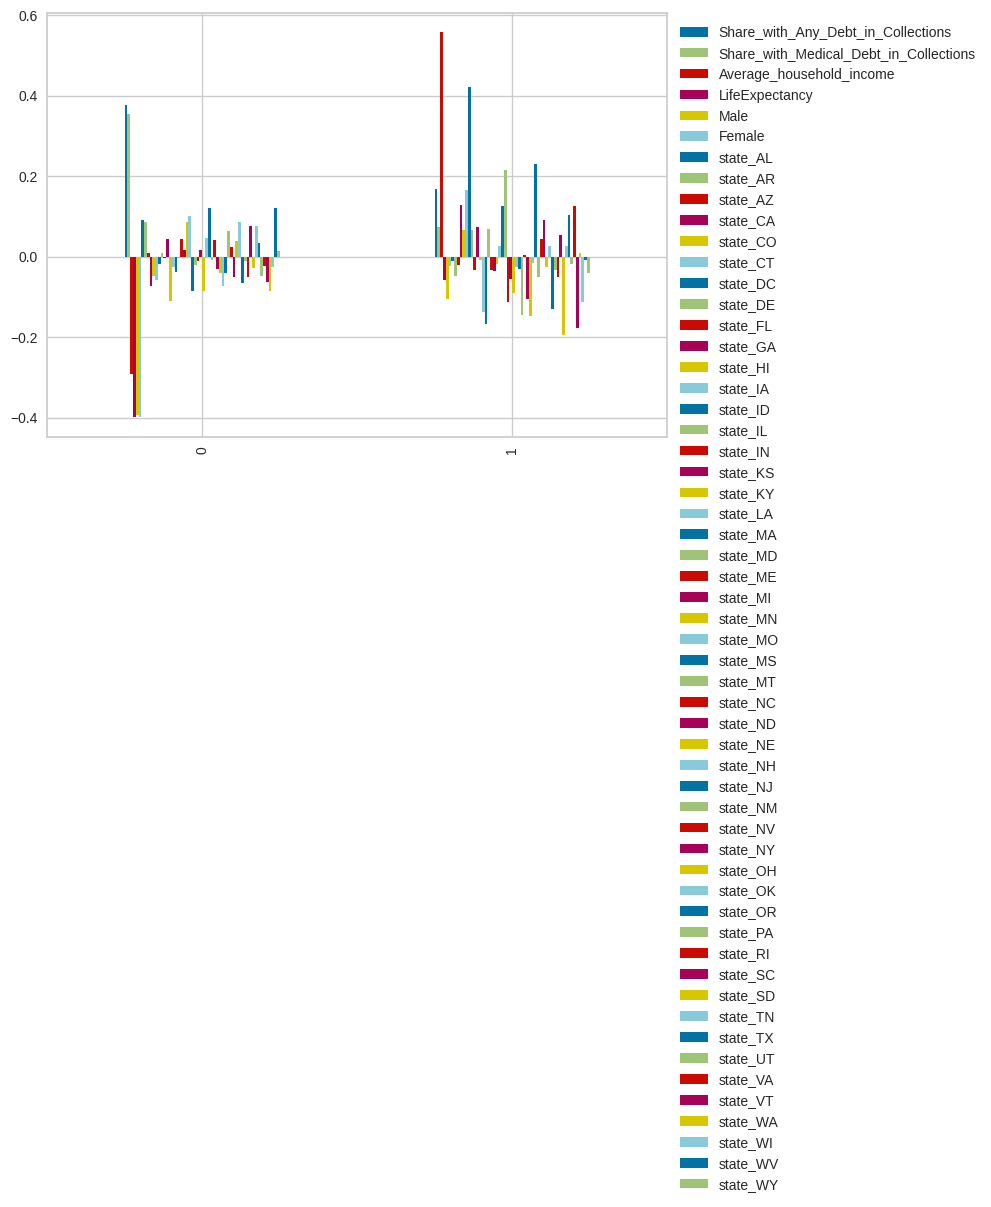

In [ ]:
(pd.DataFrame(pca.components_, columns=X.columns)
 .iloc[:2]
 .plot.bar()
 .legend(bbox_to_anchor=(1,1)))

Surprisingly, medical debt had a high negative effect. According to the graph, people with a high share of medical debt among their debt are likely to have less percentage of debt to equity ratio.

I also tried plot with seaborn. It would have been more interesting if I had debt per capita data and used it as a X,Y, and hue. The result shows that PC1 has strong influence.

<Axes: xlabel='PC1', ylabel='PC2'>

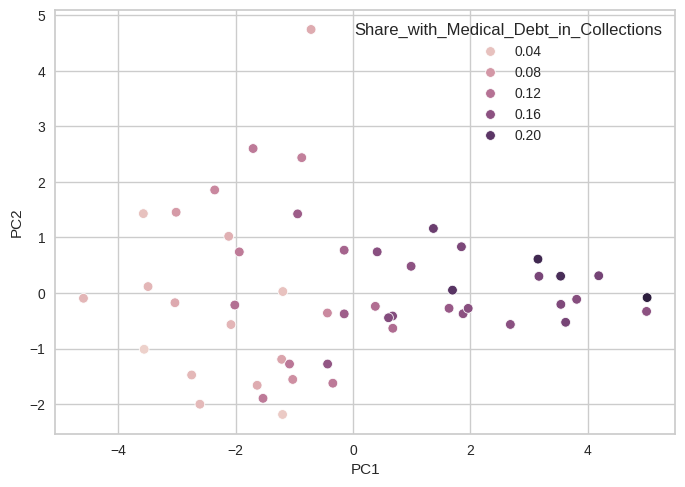

In [ ]:
sns.scatterplot(x='PC1', y='PC2',
                data=pca_X.assign(Share_with_Medical_Debt_in_Collections=df.Share_with_Medical_Debt_in_Collections),
                hue='Share_with_Medical_Debt_in_Collections')

cluster

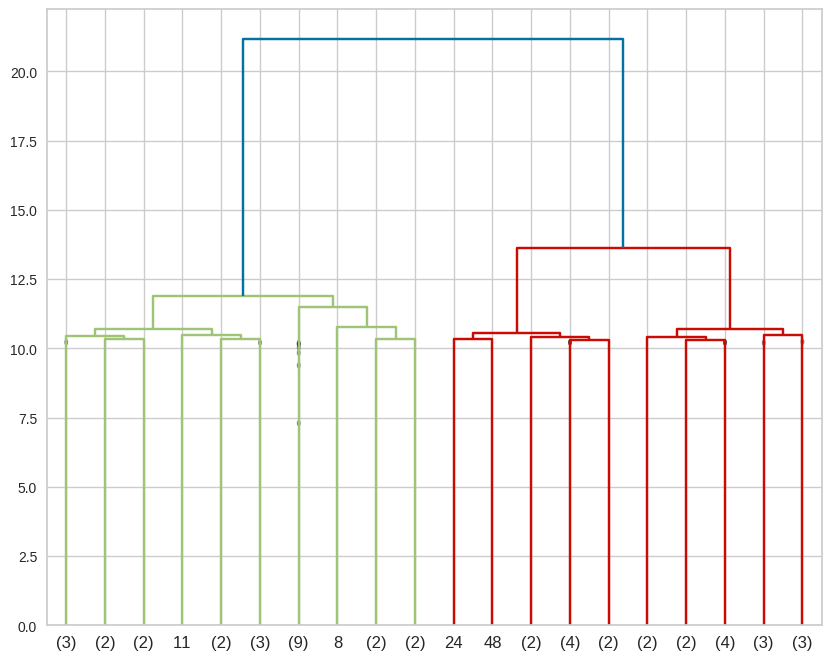

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
hierarchy.dendrogram(hierarchy.linkage(X_std, method='ward'),
                    truncate_mode='lastp', p=20, show_contracted=True)
pass

## conclusion

I breifly analyzed life expectancy and income relationship by states. The result showed that people with higher income tends to longer life expectancy, while medical debt has negative effect on them. I originally expected people with medical debt are more taken care of, to have longer life expectancy, because medical debt should show they have higher assessbility to medical treatment. On the contrary, the result shows that people with higher income tends to keep their debt low including medical debt.